## Deep Learning:- to sort out the limitation of the Machine Learning(for E-Mail classifications,for Multiple Data)
* ANN (Artificial Neural Network(ANN)
* Convolution Neural Network(CNN)(for Image Data)
* Recurrent Neural Network(RNN)(For Time Series,Sequence Data)

# Artifical Neural Network

1. input
2. weights
3. Activation Function(1. ReLu [max(0,u)] (0-max)
                       2. ELU(exponantial Linear Unit)(0.1-max)
                       3.Tanh(-1,+1)range of tanh
                       4.Sigmoid[It is use in Logistic Regression)its range is (0,1)(It is used for linear Classification)
                       5.Softmax(0,1)it is used for Multiple Classification
4. Forward Propagation
5. Loss func/COST func
6. Back propagation( To remove the 
8. Optimization Algorithm (Adam, GD, SGD, Mini Batch, RmsPromp)(through the optimization algorithm we can change the weight to remove the error betweenthe actual and predicted value)

* for regression and classification their are different different loss functions

# Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* customer id surname are not needed

In [4]:
df.shape

(10000, 14)

In [5]:
df.size

140000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Droping columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='count'>

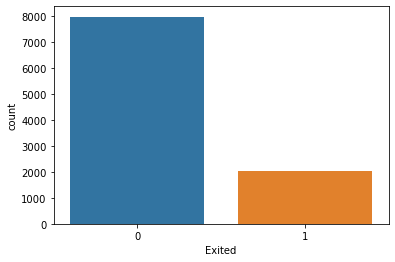

In [16]:
sns.countplot(x = 'Exited',data = df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

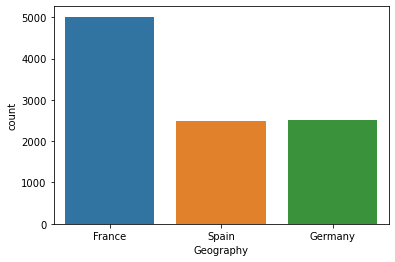

In [17]:
sns.countplot(x = 'Geography', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

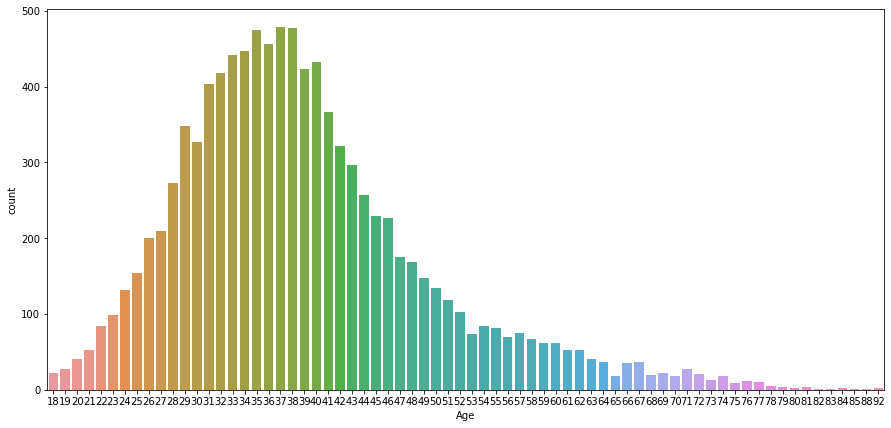

In [18]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Age', data = df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

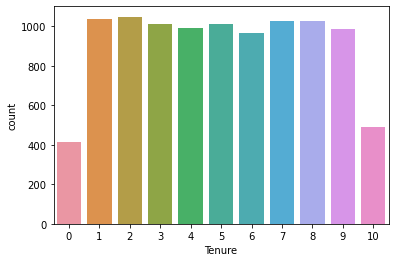

In [19]:
sns.countplot(x = 'Tenure', data = df)

# Missing Values

In [20]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
# Get dummies
df = pd.get_dummies(df,drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


df = pd.get_dummies(df, drop_first = True)
df.head()

<AxesSubplot:>

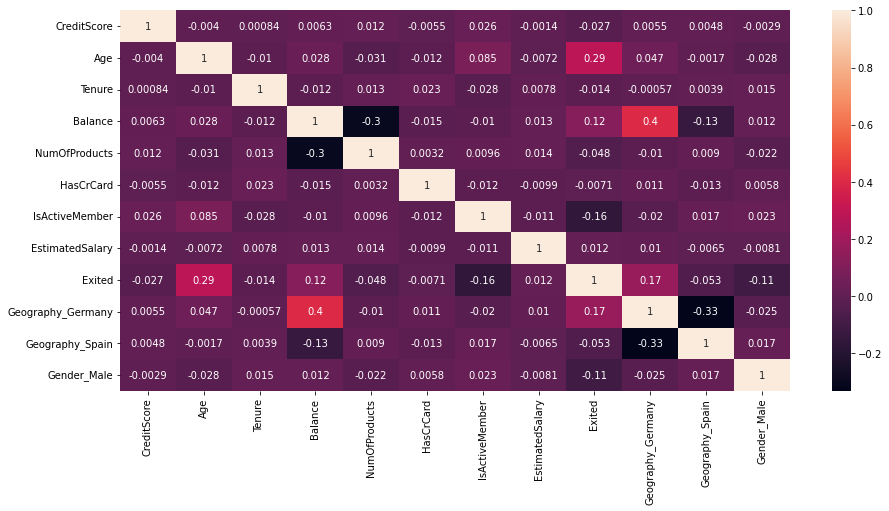

In [22]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True)

# Spliting into X AND Y

In [23]:
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Train_test_split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Feature Scalling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)

# Creating Artifical Neural Network

In [28]:
#!pip install keras

In [29]:
# Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
#!pip install tensorflow

In [31]:
x_train.shape

(8000, 11)

In [32]:
# Initializing the ANN
ann_clf = Sequential()

In [33]:
#Adding input layer and first hidden layer
ann_clf.add(Dense(activation = 'relu', input_dim = 11, units = 6, kernel_initializer='uniform'))

In [34]:
# Adding Second Hidden Layer
ann_clf.add(Dense(activation ='relu', units = 6, kernel_initializer = 'uniform'))

In [35]:
# Adding Output Layer
ann_clf.add(Dense(activation = 'sigmoid',units = 1, kernel_initializer = 'uniform'))

In [36]:
# Model Compilation
ann_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model Summary

In [37]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [38]:
ann_clf.fit(x_train, y_train, validation_split = 0.33, batch_size = 32,epochs = 50)

Epoch 1/50
168/168 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.7962 - val_loss: 0.5096 - val_accuracy: 0.7910
Epoch 2/50
168/168 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7962 - val_loss: 0.4964 - val_accuracy: 0.7910
Epoch 3/50
168/168 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7962 - val_loss: 0.4882 - val_accuracy: 0.7910
Epoch 4/50
168/168 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7962 - val_loss: 0.4834 - val_accuracy: 0.7910
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7962 - val_loss: 0.4816 - val_accuracy: 0.7910
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7962 - val_loss: 0.4794 - val_accuracy: 0.7910
Epoch 7/50
168/168 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7962 - val_loss: 0.4799 - val_accuracy: 0.7910
Epoch 

In [39]:
# Predicting the test result
y_pred = ann_clf.predict(x_test)
y_pred
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


# Accuracy and Confusion Matrix

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
acc = accuracy_score(y_test,y_pred)

In [42]:
acc

0.8035

In [47]:
# Confusion Matrix

In [46]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1607,    0],
       [ 393,    0]], dtype=int64)